# Problem Statement:
Predicting temperature of the Permanent Magnet Synchronous pmsm(PMSM) given other
sensor measurements during operation..

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from ipywidgets import interact

### Import Data

In [3]:
pmsm = pd.read_csv("/home/a/Desktop/lib/temperature_data.csv")

pmsm

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245723,0.429853,1.018568,0.836084,0.494725,72
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,0.429751,1.013416,0.834438,0.494279,72
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666,72
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581,72


## 3. Data Understanding

In [4]:
pmsm.shape

(998070, 13)

In [5]:
pmsm.isna().sum() #Fiding num values

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [6]:
pmsm.dtypes #Looking into type of dataset

ambient           float64
coolant           float64
u_d               float64
u_q               float64
motor_speed       float64
torque            float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
stator_tooth      float64
stator_winding    float64
profile_id          int64
dtype: object

In [7]:
pmsm['profile_id'].nunique() #For profile ID

52

In [9]:
pmsm['profile_id'].value_counts()

20    43970
6     40387
65    40093
66    36475
27    35360
4     33423
58    33381
56    33122
53    32441
79    31153
44    26340
70    25676
62    25599
30    23862
80    23823
74    23760
68    23330
36    22608
76    22187
48    21982
29    21357
32    20959
81    17671
45    17141
42    16919
73    16785
41    16699
63    16667
31    15586
69    15349
72    15300
10    15255
71    14655
77    14621
60    14542
61    14515
57    14402
75    13471
67    11134
49    10815
50    10809
54    10806
55    10806
78     8444
43     8442
11     7886
59     7474
51     6260
64     6249
52     3725
46     2179
47     2175
Name: profile_id, dtype: int64

<AxesSubplot:>

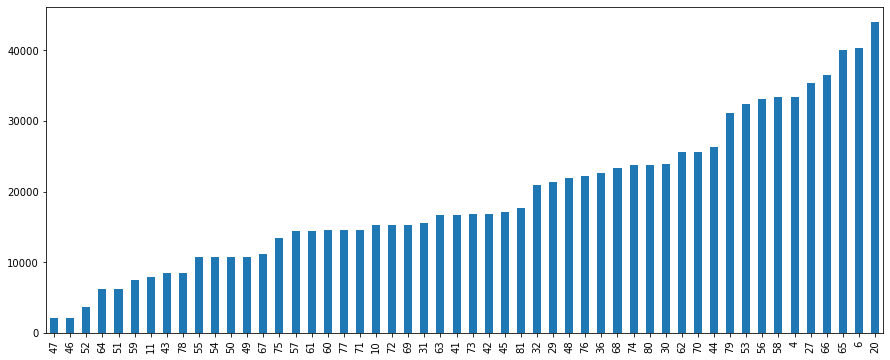

In [8]:
plt.figure(figsize=(15,6))
pmsm['profile_id'].value_counts().sort_values().plot(kind = 'bar')

## Finding Outliers

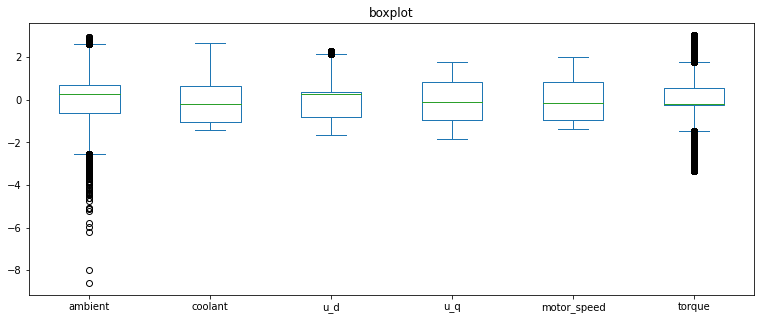

In [67]:
pmsm[pmsm.drop(labels="profile_id", axis=1).columns[:6]].plot(kind='box', title='boxplot',figsize=(13,5)) 
plt.show()

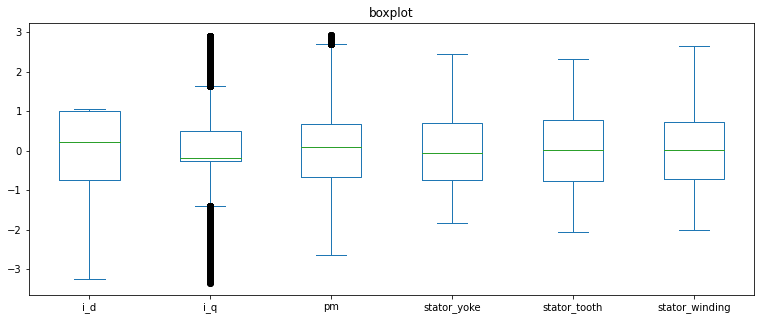

In [68]:
pmsm[pmsm.drop(labels="profile_id", axis=1).columns[6:]].plot(kind='box', title='boxplot',figsize=(13,5)) 
plt.show()

In [103]:
def plot_kde(feature):
    pmsm[feature].plot(kind='kde', title=feature,figsize=(13,5)) 
    plt.show()

widgets.interact(plot_kde, feature = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
        'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding']);

interactive(children=(Dropdown(description='feature', options=('ambient', 'coolant', 'u_d', 'u_q', 'motor_spee…

In [26]:
pmsm.describe().T

,count,mean,std,min,25%,50%,75%,max
ambient,998070.0,-0.003905,0.993127,-8.573954,-0.599385,0.266157,0.686675,2.967117
coolant,998070.0,0.004723,1.002423,-1.429349,-1.037925,-0.177187,0.650709,2.649032
u_d,998070.0,0.004780,0.997878,-1.655373,-0.826359,0.267542,0.358491,2.274734
u_q,998070.0,-0.005690,1.002330,-1.861463,-0.927390,-0.099818,0.852625,1.793498
motor_speed,998070.0,-0.006336,1.001229,-1.371529,-0.951892,-0.140246,0.853584,2.024164
torque,998070.0,-0.003333,0.997907,-3.345953,-0.266917,-0.187246,0.547171,3.016971
i_d,998070.0,0.006043,0.998994,-3.245874,-0.756296,0.213935,1.013975,1.060937
i_q,998070.0,-0.003194,0.997912,-3.341639,-0.257269,-0.190076,0.499260,2.914185
pm,998070.0,-0.004396,0.995686,-2.631991,-0.672308,0.094367,0.680691,2.917456
stator_yoke,998070.0,0.000609,1.001049,-1.834688,-0.747265,-0.057226,0.697344,2.449158


## Finding Co -relation

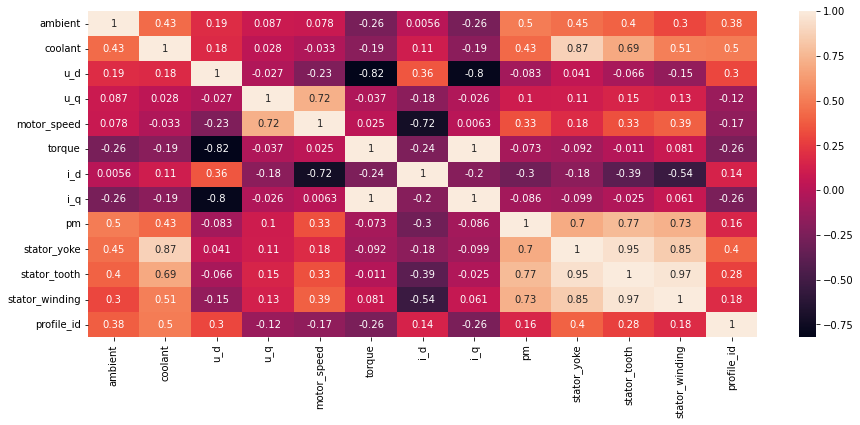

In [25]:
pmsm_corr = pmsm.corr()

plt.figure(figsize=(15,6))
sns.heatmap(pmsm_corr, annot=True)
plt.show()

### Have high co-relation

* cooland        and stator_yoke 
* stator_tooth   and stator_yoke
* stator_tooth   and stator_winding
* stator_winding and stator_yoke
* u_d            and i_q
* torque         and i_q



